In [1]:
import pandas as pd
import numpy as np

In [2]:
audit = pd.read_csv('audit_risk.csv')

Print the number of NAs in data

In [3]:
print(audit.isnull().sum())

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64


Read Trial Dataset

In [4]:
trial = pd.read_csv('trial.csv')

In [5]:
print(trial.isnull().sum())

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


# Fill NA Values

In [6]:
trial['Money_Value']=trial['Money_Value'].fillna(trial['Money_Value'].median())

In [7]:
audit['Money_Value']=audit['Money_Value'].fillna(audit['Money_Value'].median())

In [8]:
audit.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [9]:
trial.dtypes #scorea and scoreb(make float),

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

In [10]:
trial['SCORE_A']=trial['SCORE_A'].astype(float)

In [11]:
trial['SCORE_B']=trial['SCORE_B'].astype(float)

# Check if the Audit data has outliers

In [12]:
bplot1=[audit['PARA_A'],audit['Score_A'],audit['Risk_A'],audit['PARA_B'],audit['Score_B'],audit['Risk_B'],audit['TOTAL']]
bplot2=[audit['numbers'],audit['Score_B.1'],audit['Risk_C'],audit['Money_Value'],audit['Score_MV'],audit['Risk_D'],audit['District_Loss']]
bplot3=[audit['PROB'],audit['RiSk_E'],audit['History'],audit['Prob'],audit['Risk_F'],audit['Score'],audit['Inherent_Risk']]
bplot4=[audit['CONTROL_RISK'],audit['Detection_Risk'],audit['Audit_Risk'],audit['Risk']]

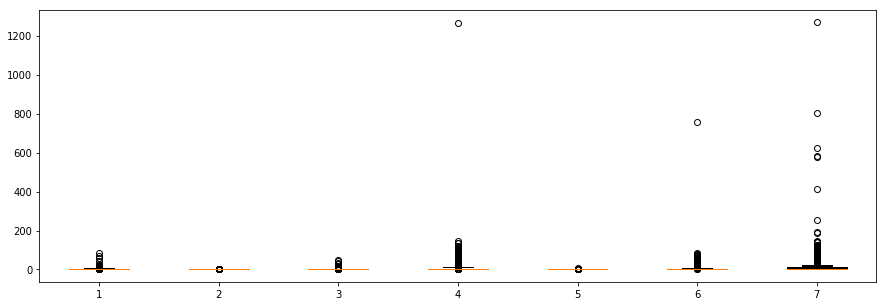

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
bp1=ax.boxplot(bplot1)

bp3=ax.boxplot(bplot3)
#bp4=ax.boxplot(bplot4)

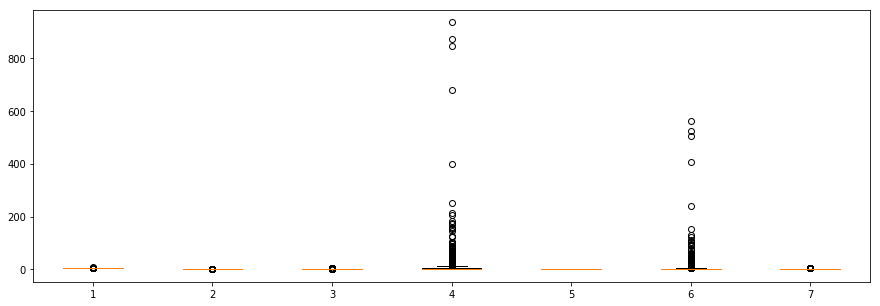

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
bp2=ax.boxplot(bplot2)

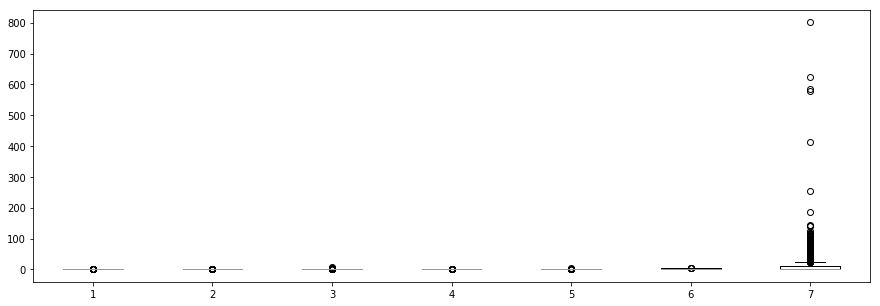

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
bp3=ax.boxplot(bplot3)

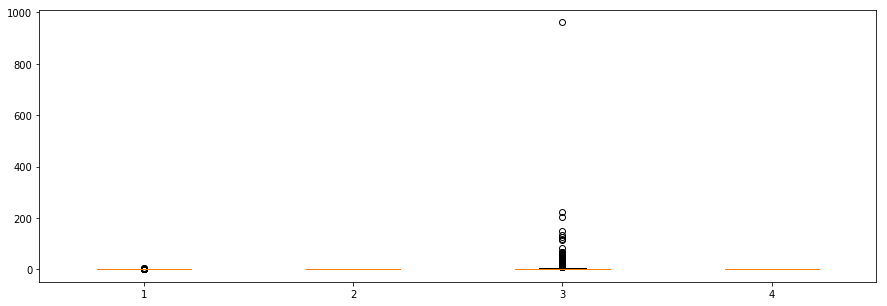

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
bp4=ax.boxplot(bplot4)

# Remove outliers in audit

Many Variables have extremely big outliers which can adversely affect the modelling and prediction. We will first convert the data to normal distribution and store in a temporary variable. We will then record the rows in which data points are 5 standard deviations away from mean(outliers). We will delete these rows from the data file. 

In [17]:
audit.shape

(776, 27)

In [18]:
from scipy import stats
z=np.abs(stats.zscore(audit.iloc[:,np.r_[0,2:27]]))
print(z) #Warning occurs because some of the columns have standard deviation 0

[[0.67046481 0.30480033 1.42984618 ...        nan 0.14112307 1.24268351]
 [0.67046481 0.43173627 0.86976136 ...        nan 0.17228042 0.80471013]
 [0.67046481 0.34187176 0.86976136 ...        nan 0.17748711 0.80471013]
 ...
 [1.45599165 0.38944709 0.86976136 ...        nan 0.17796327 0.80471013]
 [1.45599165 0.39649529 0.86976136 ...        nan 0.17804608 0.80471013]
 [1.45599165 0.43173627 0.86976136 ...        nan 0.17792186 0.80471013]]


C:\Users\parth\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [19]:
outlier =list((np.where(z > 5.0)))

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [20]:
rows=set(outlier[0])

Rows to delete

In [21]:
delrows =list(rows)

In [22]:
audit_dt=audit.drop(delrows)

In [23]:
audit_dt.shape

(729, 27)

# Remove 100% Skewed Columns

100% skewed data columns in essence means that the entire column has the same value. Naturally this does not provide any variation or information to the model. Therefore we delete these columns. 

In [24]:

for i in range(0,len(audit_dt.columns)):
    print(audit_dt.columns.values[i],' is---->   {:,.2f}'.format(audit_dt.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

Sector_score  is---->   27.16 % skewed 
LOCATION_ID  is---->   9.74 % skewed 
PARA_A  is---->   20.16 % skewed 
Score_A  is---->   55.28 % skewed 
Risk_A  is---->   20.16 % skewed 
PARA_B  is---->   36.76 % skewed 
Score_B  is---->   69.55 % skewed 
Risk_B  is---->   36.76 % skewed 
TOTAL  is---->   12.07 % skewed 
numbers  is---->   93.14 % skewed 
Score_B.1  is---->   93.14 % skewed 
Risk_C  is---->   93.14 % skewed 
Money_Value  is---->   44.72 % skewed 
Score_MV  is---->   76.82 % skewed 
Risk_D  is---->   44.86 % skewed 
District_Loss  is---->   85.05 % skewed 
PROB  is---->   100.00 % skewed 
RiSk_E  is---->   85.05 % skewed 
History  is---->   95.75 % skewed 
Prob  is---->   95.75 % skewed 
Risk_F  is---->   95.75 % skewed 
Score  is---->   39.78 % skewed 
Inherent_Risk  is---->   7.13 % skewed 
CONTROL_RISK  is---->   81.34 % skewed 
Detection_Risk  is---->   100.00 % skewed 
Audit_Risk  is---->   7.13 % skewed 
Risk  is---->   64.33 % skewed 


In [25]:
audit_dt.drop(['PROB'], axis=1, inplace = True)

In [26]:
audit_dt.drop(['Detection_Risk'], axis=1, inplace = True)

In [27]:
audit_dt.shape

(729, 25)

# Remove Outliers in Trial

Remove Everything 5 Standard deviation away from mean

In [28]:
trial.shape

(776, 18)

In [29]:
from scipy import stats
z=np.abs(stats.zscore(trial.iloc[:,np.r_[0,2:18]]))
print(z) 

[[0.67046481 0.30480033 1.42984618 ... 0.24656792 0.35250258 0.77246865]
 [0.67046481 0.43173627 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [0.67046481 0.34187176 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 ...
 [1.45599165 0.38944709 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [1.45599165 0.39649529 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [1.45599165 0.43173627 0.86976136 ... 0.24656792 0.81850259 1.29455091]]


In [30]:
outlier =list((np.where(z > 5.0)))

In [31]:
rows=set(outlier[0])

In [32]:
delrows =list(rows)

In [33]:
trial_dt=trial.drop(delrows)
trial_dt.shape

(729, 18)

# Remove 100% Skewed Columns

In [34]:
for i in range(0,len(trial_dt.columns)):
    print(trial_dt.columns.values[i],' is---->   {:,.2f}'.format(trial_dt.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

Sector_score  is---->   27.16 % skewed 
LOCATION_ID  is---->   9.74 % skewed 
PARA_A  is---->   20.16 % skewed 
SCORE_A  is---->   55.28 % skewed 
PARA_B  is---->   36.76 % skewed 
SCORE_B  is---->   69.55 % skewed 
TOTAL  is---->   12.07 % skewed 
numbers  is---->   93.14 % skewed 
Marks  is---->   93.14 % skewed 
Money_Value  is---->   44.72 % skewed 
MONEY_Marks  is---->   76.82 % skewed 
District  is---->   85.05 % skewed 
Loss  is---->   100.00 % skewed 
LOSS_SCORE  is---->   100.00 % skewed 
History  is---->   95.75 % skewed 
History_score  is---->   95.75 % skewed 
Score  is---->   39.78 % skewed 
Risk  is---->   60.22 % skewed 


In [35]:
trial_dt.drop(['Loss'], axis=1, inplace = True)
trial_dt.drop(['LOSS_SCORE'], axis=1, inplace = True)

In [36]:
trial_dt.shape

(729, 16)

# Merge two datasets into one

We use common columns to merge the two data sets.

In [37]:
cols_use = trial_dt.columns.intersection(audit_dt.columns)

In [38]:
cols_use

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers',
       'Money_Value', 'History', 'Score', 'Risk'],
      dtype='object')

In [39]:
trial_dt=trial_dt.drop_duplicates()

In [40]:
audit_dt=audit_dt.drop_duplicates()

In [41]:
data = pd.merge(audit_dt,trial_dt,how='inner',left_on=('Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers',
       'Money_Value', 'History', 'Score', 'Risk'), right_on=('Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers',
       'Money_Value', 'History', 'Score', 'Risk'))

In Audit data we have variables 'Score_A' and 'Score_B'. When we multiply these two columns by 10 we get 'SCORE_A' and 'SCORE_B' 
in trial dataset. We drop 'SCORE_A' and 'SCORE_B' because they provide the same information as 'Score_A' and 'Score_B' from
Audit data set. It is redudant to keep them.

In [42]:
data = data.drop(['SCORE_A','SCORE_B'],axis = 1)

Deleting the duplicate entries as they are redundant

In [43]:
data = data.drop_duplicates()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 536
Data columns (total 29 columns):
Sector_score     537 non-null float64
LOCATION_ID      537 non-null object
PARA_A           537 non-null float64
Score_A          537 non-null float64
Risk_A           537 non-null float64
PARA_B           537 non-null float64
Score_B          537 non-null float64
Risk_B           537 non-null float64
TOTAL            537 non-null float64
numbers          537 non-null float64
Score_B.1        537 non-null float64
Risk_C           537 non-null float64
Money_Value      537 non-null float64
Score_MV         537 non-null float64
Risk_D           537 non-null float64
District_Loss    537 non-null int64
RiSk_E           537 non-null float64
History          537 non-null int64
Prob             537 non-null float64
Risk_F           537 non-null float64
Score            537 non-null float64
Inherent_Risk    537 non-null float64
CONTROL_RISK     537 non-null float64
Audit_Risk       537 non-n

In [45]:
data.shape

(537, 29)

# Remove one variable out of Highly Correlated variable pairs

We remove one variable out of the 100% correlated variable pairs. Doing so we are getting rid of the redudandant variable 
which serves no purpose in modelling. 


In [46]:
corrmat= (data.corr().abs())
highcorr=np.where(corrmat>=0.999999999999999)



In [47]:
highcorr

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  8,  9, 10, 11, 12, 13, 14, 14,
        14, 15, 15, 15, 16, 16, 17, 17, 18, 18, 19, 20, 21, 22, 23, 24, 24,
        25, 26, 26, 26, 27, 27], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 24,  9, 10, 11, 12, 13, 14, 15,
        26, 14, 15, 26, 16, 27, 17, 18, 17, 18, 19, 20, 21, 22, 23,  8, 24,
        25, 14, 15, 26, 16, 27], dtype=int64))

In [48]:
highcorr=set([(corrmat.columns[x],corrmat.columns[y]) for x,y in zip(*highcorr) if x!=y])

In [49]:
highcorr=list(highcorr)

Below are the variable pairs that are 100% correlated with each other and therefore provide the same information to model. 
It is perfectly safe to delete one variable out of the pair

In [50]:
for i in highcorr:
    print(i[0],'   ',i[1],'------>',data[i[0]].corr(data[i[1]]))
    

RiSk_E     District ------> 1.0
Risk_F     Prob ------> 1.0
History     History_score ------> 0.9999999999999999
Marks     numbers ------> 0.9999999999999999
District     RiSk_E ------> 1.0
RiSk_E     District_Loss ------> 1.0
District_Loss     RiSk_E ------> 1.0
District     District_Loss ------> 1.0
numbers     Marks ------> 0.9999999999999999
District_Loss     District ------> 1.0
History_score     History ------> 0.9999999999999999
Prob     Risk_F ------> 1.0


In [51]:
data = data.drop(['Risk_F','District_Loss','District','Marks','History_score'],axis = 1)


In [52]:
#data = data.drop_duplicates()

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 536
Data columns (total 24 columns):
Sector_score     537 non-null float64
LOCATION_ID      537 non-null object
PARA_A           537 non-null float64
Score_A          537 non-null float64
Risk_A           537 non-null float64
PARA_B           537 non-null float64
Score_B          537 non-null float64
Risk_B           537 non-null float64
TOTAL            537 non-null float64
numbers          537 non-null float64
Score_B.1        537 non-null float64
Risk_C           537 non-null float64
Money_Value      537 non-null float64
Score_MV         537 non-null float64
Risk_D           537 non-null float64
RiSk_E           537 non-null float64
History          537 non-null int64
Prob             537 non-null float64
Score            537 non-null float64
Inherent_Risk    537 non-null float64
CONTROL_RISK     537 non-null float64
Audit_Risk       537 non-null float64
Risk             537 non-null int64
MONEY_Marks      537 non-n

In [54]:
data.shape

(537, 24)

In [55]:
data.columns.values

array(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A',
       'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1',
       'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'RiSk_E', 'History',
       'Prob', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk',
       'Risk', 'MONEY_Marks'], dtype=object)

We tried converting the location ID to one-hot-vectors and then run the model for prediction, doing so our accuracy dipped 
by approximately 5%  for almost every algorithm. Therefore we decided to drop the 'LOCATION_ID'. Doing so we could attain better accuracy score in prediction. 

In [56]:
#data = pd.concat([data, pd.get_dummies(data['LOCATION_ID'], prefix='LOCID')], axis=1)
data.drop(['LOCATION_ID'], axis=1, inplace = True)


In [57]:
#data = data.drop_duplicates()

In [58]:
import csv
with open('data.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)
    
csvfile.close()

data.to_csv('data.csv')

# Data preprocessing for Classification 

In [59]:
y = data['Risk']
X=data.drop(['Risk','Audit_Risk'],axis=1, inplace=False)
#X=data.drop(['Risk'],axis=1, inplace=False)

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [61]:
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)

In [62]:
X.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Money_Value,Score_MV,Risk_D,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,MONEY_Marks
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,3.38,0.2,0.676,0.4,0,0.2,2.4,8.574,0.4,2
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.94,0.2,0.188,0.4,0,0.2,2.0,2.554,0.4,2
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.00,0.2,0.000,0.4,0,0.2,2.0,1.548,0.4,2
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,11.75,0.6,7.050,0.4,0,0.2,4.4,17.530,0.4,6
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.00,0.2,0.000,0.4,0,0.2,2.0,1.416,0.4,2


In [63]:
print(X.isnull().sum())

Sector_score     0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
TOTAL            0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      0
Score_MV         0
Risk_D           0
RiSk_E           0
History          0
Prob             0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
MONEY_Marks      0
dtype: int64


In [64]:


Scaler= MinMaxScaler()
X_train = Scaler.fit_transform(X_train_dt)
X_test = Scaler.transform(X_test_dt)

MinMaxScaler perserves the shape of orginal distribution. It doesn't change the information embedded in the orginal data. Since we already removed the outliers 4 standard deviations away from mean in the previous step, we wanted to preserve the remaining far values and variance in data as it is to better predict the unknown data set with its variances. Standard scaler simply brings the mean of variables to zero with standard deviation 1 thereby changing the original distribution.

# Voting Classifier - Hard

In [65]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

KNN 

In [66]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [67]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 1.00


In [68]:

score=[]
for i in range(len(grid_search.grid_scores_)):
    score.append(grid_search.grid_scores_[i][1])

Text(0.5,0,'K')

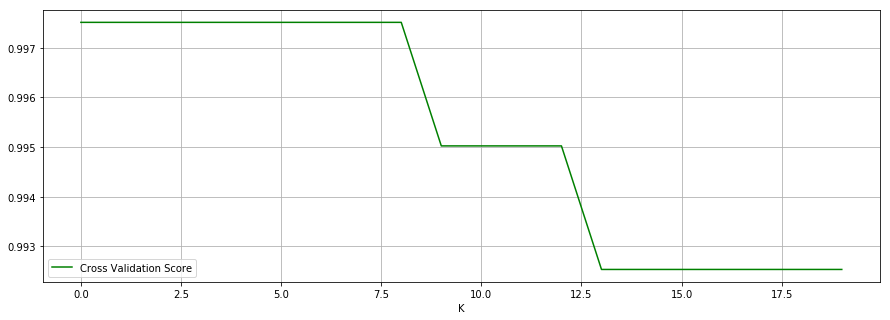

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(0,20), score, c = 'g', label = 'Cross Validation Score')
#plt.plot(range(1,20), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xlabel('K')

In [70]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

SVC RBF

In [71]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel='rbf', random_state=0,probability=True)
#model param
grid_param = {'C':[0.01, 0.1, 1, 10, 100], 
             'gamma': [0.01, 0.1, 1, 5, 10, 100]}

#grid model
grid_search = GridSearchCV(svc_rbf, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'C': 0.1, 'gamma': 5}
Best score:  1.0


In [72]:
index=[]
c_range = [0.01, 0.1, 1, 10, 100]
g_range = [0.01, 0.1, 1, 5, 10, 100]

for x in c_range:
    for g in g_range:
        index.append((x,g))
        
score=[]
for i in range(len(grid_search.grid_scores_)):
    score.append(grid_search.grid_scores_[i][1])

Text(0.5,0,'C and Gamma')

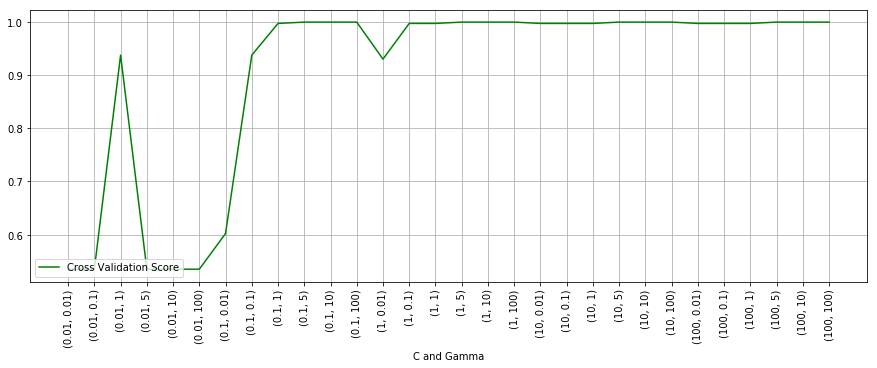

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), score, c = 'g', label = 'Cross Validation Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'C and Gamma')

In [74]:
svc_rbf = SVC(kernel='rbf', random_state=0,C=0.1,gamma=5,probability=True)
svc_rbf.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#model param
grid_param = {'penalty':['l1','l2'], 
             'C': [0.1,1,10,50,100,150]}

#grid model
grid_search = GridSearchCV(logreg, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'C': 1, 'penalty': 'l1'}
Best score:  0.9975124378109452


In [76]:
index=[]
penalty = ['l1','l2']
C = [0.1,1,10,50,100,150]

for c in C:
    for p in penalty:
        index.append((c,p))
        
score=[]
for i in range(len(grid_search.grid_scores_)):
    score.append(grid_search.grid_scores_[i][1])

Text(0.5,0,'Penalty and C')

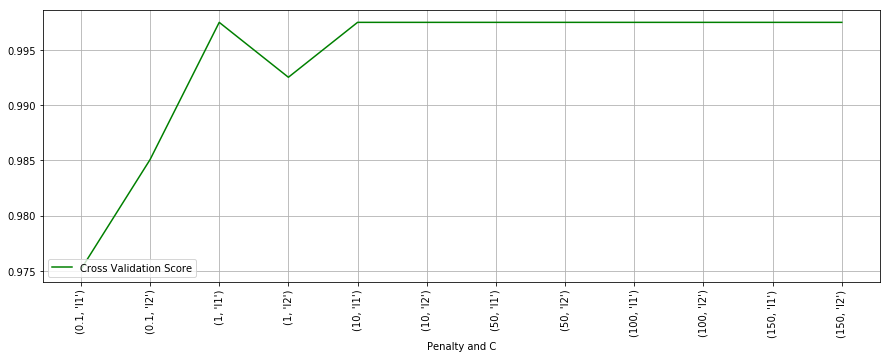

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), score, c = 'g', label = 'Cross Validation Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'Penalty and C')

In [78]:
logreg = LogisticRegression(penalty='l2', C=1, random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('knn', knn), ('svc', svc_rbf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (logreg, knn, svc_rbf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 1.0
KNeighborsClassifier 1.0
SVC 1.0
VotingClassifier 1.0


# Voting Classifier - Soft

In [80]:
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('knn', knn), ('svc', svc_rbf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (logreg, knn, svc_rbf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 1.0
KNeighborsClassifier 1.0
SVC 1.0
VotingClassifier 1.0


# Bagging

Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from  sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [82]:

dtree = DecisionTreeClassifier(random_state=0)

#model param
grid_param = {'max_depth':[1,2,3,4,5,6]}

#grid model
grid_search = GridSearchCV(dtree, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)


Best params:  {'max_depth': 1}
Best score:  0.9975124378109452


In [83]:
dtree = DecisionTreeClassifier(max_depth=1,random_state=0)
bag= BaggingClassifier(dtree, n_estimators=500,max_samples=100, bootstrap=True, random_state=0)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print('Train score: {:.2f}'.format(bag.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag.score(X_test, y_test)))
print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))



Train score: 1.00
Test score: 1.00
Prediction Accuracy: 1.000
Confusion matrix:
[[63  0]
 [ 0 72]]


SVC Kernel Linear

In [84]:

svc_lin = SVC(kernel='linear', C=x)

#model param
grid_param = {'C':[1,10,100,200,300]}

#grid model
grid_search = GridSearchCV(svc_lin, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)


Best params:  {'C': 1}
Best score:  1.0


In [85]:
svc_lin = SVC(kernel='linear', C=1)
bag= BaggingClassifier(svc_lin, n_estimators=500,max_samples=100, bootstrap=True, random_state=0)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print('Train score: {:.2f}'.format(bag.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag.score(X_test, y_test)))
print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Train score: 1.00
Test score: 1.00
Prediction Accuracy: 1.000
Confusion matrix:
[[63  0]
 [ 0 72]]


# Pasting

Best Parameter: 1 - From previous GridSearchCV in Hard Voting Classifier Section

In [86]:
knn = KNeighborsClassifier(1)
bag= BaggingClassifier(knn, n_estimators=500,max_samples=100, bootstrap=False, random_state=0)
bag.fit(X_train, y_train)
print("Train scores: {}".format(bag.score(X_train, y_train)))
print("Test scores: {}".format(bag.score(X_test, y_test)))
pred = bag.predict(X_test)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Train scores: 0.9975124378109452
Test scores: 1.0
Confusion matrix:
[[63  0]
 [ 0 72]]
Prediction Accuracy: 1.000


Decision Tree

Best Parameter: 1 - From previous GridSearchCV in Hard Voting Classifier Section

In [87]:
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
bag= BaggingClassifier(dtree, n_estimators=500,max_samples=100, bootstrap=False, random_state=0)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print('Train score: {:.2f}'.format(bag.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag.score(X_test, y_test)))
print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Train score: 1.00
Test score: 1.00
Prediction Accuracy: 1.000
Confusion matrix:
[[63  0]
 [ 0 72]]


# AdaBoost

Decision tree Adaboost

Best Parameter: 1 - From previous GridSearchCV in Hard Voting Classifier Section

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
scorestrain=np.mean(cross_val_score(ada_clf, X_train, y_train, cv=5))
scorestest=np.mean(cross_val_score(ada_clf, X_test, y_test, cv=5))
print('Train score: {:.2f}'.format(scorestrain))
print('Test score: {:.2f}'.format(scorestest))
y_pred = ada_clf.predict(X_test)
print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Train score: 1.00
Test score: 1.00
Prediction Accuracy: 1.000
Confusion matrix:
[[63  0]
 [ 0 72]]


SVC Adaboost

In [89]:
svc=SVC(kernel='linear',C=10, probability=True)

ada_clf=AdaBoostClassifier(base_estimator=svc,n_estimators=10,learning_rate=0.5, random_state=0, algorithm="SAMME.R")
ada_clf.fit(X_train,y_train)
scorestrain=np.mean(cross_val_score(ada_clf, X_train, y_train, cv=5))
scorestest=np.mean(cross_val_score(ada_clf, X_test, y_test, cv=5))
print('Train score: {:.2f}'.format(scorestrain))
print('Test score: {:.2f}'.format(scorestest))
y_pred = ada_clf.predict(X_test)
print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Train score: 1.00
Test score: 1.00
Prediction Accuracy: 1.000
Confusion matrix:
[[63  0]
 [ 0 72]]


Gradient Boosting 

In [90]:
from  sklearn.ensemble import GradientBoostingClassifier

In [91]:
gbrt = GradientBoostingClassifier(random_state=0)

#model param
grid_param = {'learning_rate':[1,0.5,0.25,0.1,0.05], 'max_depth':[1,2,3,4,5], 'n_estimators':[1,5,10,20,30]}

#grid model
grid_search = GridSearchCV(gbrt, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)


Best params:  {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 1}
Best score:  0.9975124378109452


In [92]:
gbrt = GradientBoostingClassifier(max_depth=1, learning_rate=1, n_estimators=1, random_state=0)
gbrt.fit(X_train,y_train)
scorestrain=np.mean(cross_val_score(gbrt, X_train, y_train, cv=5))
scorestest=np.mean(cross_val_score(gbrt, X_test, y_test, cv=5))
print('Train score: {:.2f}'.format(scorestrain))
print('Test score: {:.2f}'.format(scorestest))
y_pred = gbrt.predict(X_test)
print('Prediction Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Train score: 1.00
Test score: 1.00
Prediction Accuracy: 1.000
Confusion matrix:
[[63  0]
 [ 0 72]]


# PCA

In [93]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import statistics

In [94]:
pca=PCA(n_components=0.95)
pca.fit(X_train)
X_train_reduced=pca.transform(X_train)
X_test_reduced=pca.transform(X_test)
pca.n_components_

8

In [95]:
pca.explained_variance_

array([0.78535712, 0.16771047, 0.14880166, 0.12508276, 0.09578634,
       0.07598451, 0.05887186, 0.03682949])

Importing results from the previous project file to check if PCA worsens or gives better results

In [96]:
results = pd.read_csv('ClassificationResults.csv')
results

,Model,PCA,CrossValTrain,CrossValTest,Accuracy
0,LinearSVC,without,0.992500,1.000000,100
1,LogisticRegression,without,0.992500,0.992593,100
2,KNN,without,0.992500,0.970370,100
3,SVC_RBF,without,0.997512,1.000000,100
4,SVC_Linear,without,1.000000,1.000000,100
5,SVC_Poly,without,0.992537,1.000000,100
6,DecisionTree,without,0.997512,1.000000,100


In [97]:
#result=pd.DataFrame(index=['TrainSc','TestSc','CrossValTr','CrossValTs','Accuracy'], columns=["Without PCA","With PCA"])

In [98]:
#result

In [99]:
#LinearSVC with PCA

In [100]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(X_train_reduced,y_train)

scorestrain=(cross_val_score(clf, X_train_reduced, y_train,cv=3)).mean()
scorestest=(cross_val_score(clf, X_test_reduced, y_test,cv=3)).mean()
pred = clf.predict(X_test_reduced)
Accuracy=statistics.mean(y_test==pred)*100

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))


line = pd.DataFrame({'Model':"LinearSVC" , 'PCA': "with", 'CrossValTrain': scorestrain,'CrossValTest':scorestest,'Accuracy':Accuracy}, index=[0.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results



Confusion matrix:
[[63  0]
 [ 0 72]]


,Model,PCA,CrossValTrain,CrossValTest,Accuracy
0,LinearSVC,without,0.992500,1.000000,100
1,LinearSVC,with,0.992500,1.000000,100
2,LogisticRegression,without,0.992500,0.992593,100
3,KNN,without,0.992500,0.970370,100
4,SVC_RBF,without,0.997512,1.000000,100
5,SVC_Linear,without,1.000000,1.000000,100
6,SVC_Poly,without,0.992537,1.000000,100
7,DecisionTree,without,0.997512,1.000000,100


#### For LinearSVC, PCA gives exactly the same results in predicting risk. Both cases exhibit 100% accuracy.

In [101]:
confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[63  0]
 [ 0 72]]


Logistic Regression With/Without PCA (Best Parameters taken from previous project file)

In [102]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#model param
grid_param = {'penalty':['l1','l2'], 
             'C': [0.1,1,10,50,100,150]}

#grid model
grid_search = GridSearchCV(logreg, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'C': 1, 'penalty': 'l1'}
Best score:  0.9975124378109452


In [103]:
logreg = LogisticRegression(penalty='l1', C=1, random_state=0)
logreg.fit(X_train_reduced,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
scorestrain=(cross_val_score(logreg, X_train_reduced, y_train,cv=3)).mean()
scorestest=(cross_val_score(logreg, X_test_reduced, y_test,cv=3)).mean()
pred = logreg.predict(X_test_reduced)
Accuracy=statistics.mean(y_test==pred)*100

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

line = pd.DataFrame({'Model':"LogisticRegression" , 'PCA': "with", 'CrossValTrain': scorestrain,'CrossValTest':scorestest,'Accuracy':Accuracy}, index=[2.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Confusion matrix:
[[63  0]
 [ 0 72]]


,Model,PCA,CrossValTrain,CrossValTest,Accuracy
0,LinearSVC,without,0.992500,1.000000,100
1,LinearSVC,with,0.992500,1.000000,100
2,LogisticRegression,without,0.992500,0.992593,100
3,LogisticRegression,with,0.992500,0.985185,100
4,KNN,without,0.992500,0.970370,100
5,SVC_RBF,without,0.997512,1.000000,100
6,SVC_Linear,without,1.000000,1.000000,100
7,SVC_Poly,without,0.992537,1.000000,100
8,DecisionTree,without,0.997512,1.000000,100


#### For LogisticRegression, PCA gives slightly worse test score but results in same Accuracy (100%). It is clear that in this case, no matter how small, the models suffers from loss of variation(information) in data

KNN:Best Parameter Search for Reduced dataset

In [105]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
print("Parameter grid:\n{}".format(param_grid))

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
Best parameters: {'n_neighbors': 1}
Best cross-validation score: 1.00


In [106]:
knn = KNeighborsClassifier(1)
knn.fit(X_train_reduced, y_train)
scorestrain=(cross_val_score(knn, X_train_reduced, y_train,cv=3)).mean()
scorestest=(cross_val_score(knn, X_test_reduced, y_test,cv=3)).mean()
pred = knn.predict(X_test_reduced)
Accuracy=statistics.mean(y_test==pred)*100

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

line = pd.DataFrame({'Model':"KNN" , 'PCA': "with", 'CrossValTrain': scorestrain,'CrossValTest':scorestest,'Accuracy':Accuracy}, index=[4.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Confusion matrix:
[[63  0]
 [ 0 72]]


,Model,PCA,CrossValTrain,CrossValTest,Accuracy
0,LinearSVC,without,0.992500,1.000000,100
1,LinearSVC,with,0.992500,1.000000,100
2,LogisticRegression,without,0.992500,0.992593,100
3,LogisticRegression,with,0.992500,0.985185,100
4,KNN,without,0.992500,0.970370,100
5,KNN,with,0.997512,1.000000,100
6,SVC_RBF,without,0.997512,1.000000,100
7,SVC_Linear,without,1.000000,1.000000,100
8,SVC_Poly,without,0.992537,1.000000,100
9,DecisionTree,without,0.997512,1.000000,100


#### For KNN, PCA gives slightly better testing and training score and results in same Accuracy (100%). This may be due to eliminating insignificant predictors in the dataset. The significant predictors in the PCA dataset are enough to classify the neigboring datapoints to either class.

SVC RBF with best parameter search for Reduced Dataset

In [107]:
svc_rbf = SVC(kernel='rbf', random_state=0,probability=True)
#model param
grid_param = {'C':[0.01, 0.1, 1, 10, 100], 
             'gamma': [0.01, 0.1, 1, 5, 10, 100]}

#grid model
grid_search = GridSearchCV(svc_rbf, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'C': 0.1, 'gamma': 5}
Best score:  1.0


In [108]:
svc_rbf = SVC(kernel='rbf', gamma=5,C=0.1)
svc_rbf.fit(X_train_reduced,y_train)

scorestrain=(cross_val_score(svc_rbf, X_train_reduced, y_train,cv=3)).mean()
scorestest=(cross_val_score(svc_rbf, X_test_reduced, y_test,cv=3)).mean()
pred = svc_rbf.predict(X_test_reduced)
Accuracy=statistics.mean(y_test==pred)*100

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

line = pd.DataFrame({'Model':"SVC_RBF" , 'PCA': "with", 'CrossValTrain': scorestrain,'CrossValTest':scorestest,'Accuracy':Accuracy}, index=[6.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Confusion matrix:
[[63  0]
 [ 0 72]]


,Model,PCA,CrossValTrain,CrossValTest,Accuracy
0,LinearSVC,without,0.992500,1.000000,100
1,LinearSVC,with,0.992500,1.000000,100
2,LogisticRegression,without,0.992500,0.992593,100
3,LogisticRegression,with,0.992500,0.985185,100
4,KNN,without,0.992500,0.970370,100
5,KNN,with,0.997512,1.000000,100
6,SVC_RBF,without,0.997512,1.000000,100
7,SVC_RBF,with,1.000000,1.000000,100
8,SVC_Linear,without,1.000000,1.000000,100
9,SVC_Poly,without,0.992537,1.000000,100


#### For SVC RBF, PCA gives slightly better train score and results in same Accuracy (100%).

SVC Linear With PCA Best Param search

In [109]:
svc_lin = SVC(kernel='linear', random_state=0,probability=True)
#model param
grid_param = {'C':[1,10,100,200,300]}

#grid model
grid_search = GridSearchCV(svc_lin, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)


Best params:  {'C': 1}
Best score:  1.0


In [110]:
svc_lin = SVC(kernel='linear', C=1)
svc_lin.fit(X_train_reduced,y_train)

scorestrain=(cross_val_score(svc_lin, X_train_reduced, y_train,cv=3)).mean()
scorestest=(cross_val_score(svc_lin, X_test_reduced, y_test,cv=3)).mean()
pred = svc_lin.predict(X_test_reduced)
Accuracy=statistics.mean(y_test==pred)*100

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

line = pd.DataFrame({'Model':"SVC_Linear" , 'PCA': "with", 'CrossValTrain': scorestrain,'CrossValTest':scorestest,'Accuracy':Accuracy}, index=[8.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Confusion matrix:
[[63  0]
 [ 0 72]]


,Model,PCA,CrossValTrain,CrossValTest,Accuracy
0,LinearSVC,without,0.992500,1.000000,100
1,LinearSVC,with,0.992500,1.000000,100
2,LogisticRegression,without,0.992500,0.992593,100
3,LogisticRegression,with,0.992500,0.985185,100
4,KNN,without,0.992500,0.970370,100
5,KNN,with,0.997512,1.000000,100
6,SVC_RBF,without,0.997512,1.000000,100
7,SVC_RBF,with,1.000000,1.000000,100
8,SVC_Linear,without,1.000000,1.000000,100
9,SVC_Linear,with,1.000000,1.000000,100


#### For SVC Linear, PCA gives excatly the same train, test score and results in same Accuracy (100%).

SVC_POLY with PCA best parameter search

In [111]:
svc_poly = SVC(kernel='poly', random_state=0,probability=True)
#model param
grid_param = {'degree':[1,2,3,4],'C':[1,10,100,200,300]}

#grid model
grid_search = GridSearchCV(svc_poly, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)


Best params:  {'C': 10, 'degree': 1}
Best score:  1.0


In [112]:
svc_poly = SVC(kernel='poly', degree=1, C=10)
svc_poly.fit(X_train_reduced,y_train)

scorestrain=(cross_val_score(svc_poly, X_train_reduced, y_train,cv=3)).mean()
scorestest=(cross_val_score(svc_poly, X_test_reduced, y_test,cv=3)).mean()
pred = svc_poly.predict(X_test_reduced)
Accuracy=statistics.mean(y_test==pred)*100

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

line = pd.DataFrame({'Model':"SVC_Poly" , 'PCA': "with", 'CrossValTrain': scorestrain,'CrossValTest':scorestest,'Accuracy':Accuracy}, index=[10.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Confusion matrix:
[[63  0]
 [ 0 72]]


,Model,PCA,CrossValTrain,CrossValTest,Accuracy
0,LinearSVC,without,0.992500,1.000000,100
1,LinearSVC,with,0.992500,1.000000,100
2,LogisticRegression,without,0.992500,0.992593,100
3,LogisticRegression,with,0.992500,0.985185,100
4,KNN,without,0.992500,0.970370,100
5,KNN,with,0.997512,1.000000,100
6,SVC_RBF,without,0.997512,1.000000,100
7,SVC_RBF,with,1.000000,1.000000,100
8,SVC_Linear,without,1.000000,1.000000,100
9,SVC_Linear,with,1.000000,1.000000,100


#### For SVC Polynomial, PCA gives slightly better train score and results in same Accuracy (100%).

Decision Tree with PCA and best params search

In [113]:
dtree = DecisionTreeClassifier(random_state=0)
#model param
grid_param = {'max_depth':[1,2,3,4,5]}

#grid model
grid_search = GridSearchCV(dtree, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'max_depth': 1}
Best score:  0.9950248756218906


In [114]:
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
dtree.fit(X_train_reduced, y_train)

scorestrain=(cross_val_score(dtree, X_train_reduced, y_train,cv=3)).mean()
scorestest=(cross_val_score(dtree, X_test_reduced, y_test,cv=3)).mean()
pred = dtree.predict(X_test_reduced)
Accuracy=statistics.mean(y_test==pred)*100

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))

line = pd.DataFrame({'Model':"DecisionTree" , 'PCA': "with", 'CrossValTrain': scorestrain,'CrossValTest':scorestest,'Accuracy':Accuracy}, index=[12.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Confusion matrix:
[[63  0]
 [ 1 71]]


,Model,PCA,CrossValTrain,CrossValTest,Accuracy
0,LinearSVC,without,0.992500,1.000000,100.000000
1,LinearSVC,with,0.992500,1.000000,100.000000
2,LogisticRegression,without,0.992500,0.992593,100.000000
3,LogisticRegression,with,0.992500,0.985185,100.000000
4,KNN,without,0.992500,0.970370,100.000000
5,KNN,with,0.997512,1.000000,100.000000
6,SVC_RBF,without,0.997512,1.000000,100.000000
7,SVC_RBF,with,1.000000,1.000000,100.000000
8,SVC_Linear,without,1.000000,1.000000,100.000000
9,SVC_Linear,with,1.000000,1.000000,100.000000


#### For Decision Tree, PCA gives slightly worse train and test score and results in one misclassification, giving the Accuracy of (99.2%). In this case, PCA results in loss of information while modelling. 

In [115]:
    X.shape

(537, 21)

# Neural Networks

In [116]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
#step 1: make model - no hidden layer
model = Sequential()
#input layer: input_dim = no. of columns in X_train
model.add(Dense(10, input_dim = 21 , activation = 'sigmoid'))
#hidden layer : add if needed
#output layer
model.add(Dense(1))

# step 2: compile the model -> create the computational graph
model.compile(loss ='mse', optimizer = 'sgd' , metrics = ['mse'] )

# step 3: train the model -> fit epochs and batch_size
model.fit(X_train, y_train, epochs = 400, batch_size = 128)

#step 4: evaluation
model.evaluate(X_train, y_train)

Using TensorFlow backend.


Epoch 1/400
402/402 [==============================] - 0s 379us/step - loss: 0.4364 - mean_squared_error: 0.4364
Epoch 2/400
402/402 [==============================] - 0s 17us/step - loss: 0.3312 - mean_squared_error: 0.3312
Epoch 3/400
402/402 [==============================] - 0s 17us/step - loss: 0.2742 - mean_squared_error: 0.2742
Epoch 4/400
402/402 [==============================] - 0s 17us/step - loss: 0.2419 - mean_squared_error: 0.2419
Epoch 5/400
402/402 [==============================] - 0s 15us/step - loss: 0.2301 - mean_squared_error: 0.2301
Epoch 6/400
402/402 [==============================] - 0s 15us/step - loss: 0.2198 - mean_squared_error: 0.2198
Epoch 7/400
402/402 [==============================] - 0s 15us/step - loss: 0.2143 - mean_squared_error: 0.2143
Epoch 8/400
402/402 [==============================] - 0s 15us/step - loss: 0.2117 - mean_squared_error: 0.2117
Epoch 9/400
402/402 [==============================] - 0s 15us/step - loss: 0.2071 - mean_squared_error

402/402 [==============================] - 0s 20us/step - loss: 0.1139 - mean_squared_error: 0.1139
Epoch 73/400
402/402 [==============================] - 0s 15us/step - loss: 0.1132 - mean_squared_error: 0.1132
Epoch 74/400
402/402 [==============================] - 0s 22us/step - loss: 0.1122 - mean_squared_error: 0.1122
Epoch 75/400
402/402 [==============================] - 0s 17us/step - loss: 0.1114 - mean_squared_error: 0.1114
Epoch 76/400
402/402 [==============================] - 0s 17us/step - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 77/400
402/402 [==============================] - 0s 15us/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 78/400
402/402 [==============================] - 0s 17us/step - loss: 0.1091 - mean_squared_error: 0.1091
Epoch 79/400
402/402 [==============================] - 0s 15us/step - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 80/400
402/402 [==============================] - 0s 17us/step - loss: 0.1076 - mean_squared_error: 0.1

402/402 [==============================] - 0s 17us/step - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 145/400
402/402 [==============================] - 0s 17us/step - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 146/400
402/402 [==============================] - 0s 17us/step - loss: 0.0771 - mean_squared_error: 0.0771
Epoch 147/400
402/402 [==============================] - 0s 17us/step - loss: 0.0770 - mean_squared_error: 0.0770
Epoch 148/400
402/402 [==============================] - 0s 17us/step - loss: 0.0768 - mean_squared_error: 0.0768
Epoch 149/400
402/402 [==============================] - 0s 17us/step - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 150/400
402/402 [==============================] - 0s 15us/step - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 151/400
402/402 [==============================] - 0s 17us/step - loss: 0.0758 - mean_squared_error: 0.0758
Epoch 152/400
402/402 [==============================] - 0s 17us/step - loss: 0.0754 - mean_squared_er

Epoch 216/400
402/402 [==============================] - 0s 22us/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 217/400
402/402 [==============================] - 0s 22us/step - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 218/400
402/402 [==============================] - 0s 22us/step - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 219/400
402/402 [==============================] - 0s 20us/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 220/400
402/402 [==============================] - 0s 20us/step - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 221/400
402/402 [==============================] - 0s 17us/step - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 222/400
402/402 [==============================] - 0s 15us/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 223/400
402/402 [==============================] - 0s 20us/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 224/400
402/402 [==============================] - 0s 15us/step - loss: 0.0633 - m

402/402 [==============================] - 0s 17us/step - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 288/400
402/402 [==============================] - 0s 17us/step - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 289/400
402/402 [==============================] - 0s 15us/step - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 290/400
402/402 [==============================] - 0s 17us/step - loss: 0.0571 - mean_squared_error: 0.0571
Epoch 291/400
402/402 [==============================] - 0s 15us/step - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 292/400
402/402 [==============================] - 0s 17us/step - loss: 0.0570 - mean_squared_error: 0.0570
Epoch 293/400
402/402 [==============================] - 0s 17us/step - loss: 0.0569 - mean_squared_error: 0.0569
Epoch 294/400
402/402 [==============================] - 0s 20us/step - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 295/400
402/402 [==============================] - 0s 20us/step - loss: 0.0567 - mean_squared_er

402/402 [==============================] - 0s 17us/step - loss: 0.0525 - mean_squared_error: 0.0525
Epoch 359/400
402/402 [==============================] - 0s 17us/step - loss: 0.0524 - mean_squared_error: 0.0524
Epoch 360/400
402/402 [==============================] - 0s 15us/step - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 361/400
402/402 [==============================] - 0s 17us/step - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 362/400
402/402 [==============================] - 0s 15us/step - loss: 0.0522 - mean_squared_error: 0.0522
Epoch 363/400
402/402 [==============================] - 0s 20us/step - loss: 0.0522 - mean_squared_error: 0.0522
Epoch 364/400
402/402 [==============================] - 0s 17us/step - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 365/400
402/402 [==============================] - 0s 17us/step - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 366/400
402/402 [==============================] - 0s 17us/step - loss: 0.0521 - mean_squared_er

[0.05005736815840451, 0.05005736815840451]

In [117]:

pred = model.predict(X_test)
for i in range(len(pred)):
    if pred[i,0]>=0.5:
        pred[i,0]=1
    else:
        pred[i,0]=0
Accuracy=statistics.mean(y_test==pred[:,0])*100
confusion = confusion_matrix(y_test, pred[:,0])
print("Confusion matrix:\n{}".format(confusion))
print("Accuracy :\n{}".format(Accuracy))



Confusion matrix:
[[63  0]
 [ 4 68]]
Accuracy :
97.03703703703704


### Multilayer

In [118]:
#step 1: build the model
model = Sequential()
#input layer
model.add(Dense(10, input_dim = 21, activation = 'sigmoid'))
#hidden layers

model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
#output layer
model.add(Dense(1))

#step 2: build the computational graph - compile
model.compile(loss = 'mae', optimizer = 'sgd', metrics = ['mse'])

#step 3: train the model
model.fit(X_train, y_train, epochs = 400, batch_size= 20)

#step 4: evaluate
model.evaluate(X_train, y_train)

Epoch 1/400
402/402 [==============================] - 0s 546us/step - loss: 0.6728 - mean_squared_error: 0.7240
Epoch 2/400
402/402 [==============================] - 0s 57us/step - loss: 0.4727 - mean_squared_error: 0.4545
Epoch 3/400
402/402 [==============================] - 0s 278us/step - loss: 0.4716 - mean_squared_error: 0.4571
Epoch 4/400
402/402 [==============================] - 0s 60us/step - loss: 0.4710 - mean_squared_error: 0.4490
Epoch 5/400
402/402 [==============================] - 0s 57us/step - loss: 0.4693 - mean_squared_error: 0.4558
Epoch 6/400
402/402 [==============================] - 0s 57us/step - loss: 0.4690 - mean_squared_error: 0.4439
Epoch 7/400
402/402 [==============================] - 0s 57us/step - loss: 0.4686 - mean_squared_error: 0.4510
Epoch 8/400
402/402 [==============================] - 0s 55us/step - loss: 0.4673 - mean_squared_error: 0.4499
Epoch 9/400
402/402 [==============================] - 0s 62us/step - loss: 0.4667 - mean_squared_erro

402/402 [==============================] - 0s 67us/step - loss: 0.1125 - mean_squared_error: 0.0364
Epoch 74/400
402/402 [==============================] - 0s 57us/step - loss: 0.1090 - mean_squared_error: 0.0353
Epoch 75/400
402/402 [==============================] - 0s 57us/step - loss: 0.1045 - mean_squared_error: 0.0347
Epoch 76/400
402/402 [==============================] - 0s 55us/step - loss: 0.0965 - mean_squared_error: 0.0293
Epoch 77/400
402/402 [==============================] - 0s 57us/step - loss: 0.0916 - mean_squared_error: 0.0272
Epoch 78/400
402/402 [==============================] - 0s 62us/step - loss: 0.0878 - mean_squared_error: 0.0263
Epoch 79/400
402/402 [==============================] - 0s 57us/step - loss: 0.0809 - mean_squared_error: 0.0241
Epoch 80/400
402/402 [==============================] - 0s 58us/step - loss: 0.0757 - mean_squared_error: 0.0218
Epoch 81/400
402/402 [==============================] - 0s 67us/step - loss: 0.0762 - mean_squared_error: 0.0

402/402 [==============================] - 0s 60us/step - loss: 0.0347 - mean_squared_error: 0.0032
Epoch 145/400
402/402 [==============================] - 0s 57us/step - loss: 0.0316 - mean_squared_error: 0.0028
Epoch 146/400
402/402 [==============================] - 0s 57us/step - loss: 0.0323 - mean_squared_error: 0.0027
Epoch 147/400
402/402 [==============================] - 0s 52us/step - loss: 0.0271 - mean_squared_error: 0.0024
Epoch 148/400
402/402 [==============================] - 0s 65us/step - loss: 0.0294 - mean_squared_error: 0.0026
Epoch 149/400
402/402 [==============================] - 0s 57us/step - loss: 0.0302 - mean_squared_error: 0.0026
Epoch 150/400
402/402 [==============================] - 0s 62us/step - loss: 0.0285 - mean_squared_error: 0.0028
Epoch 151/400
402/402 [==============================] - 0s 62us/step - loss: 0.0266 - mean_squared_error: 0.0026
Epoch 152/400
402/402 [==============================] - 0s 52us/step - loss: 0.0283 - mean_squared_er

Epoch 216/400
402/402 [==============================] - 0s 57us/step - loss: 0.0250 - mean_squared_error: 0.0016
Epoch 217/400
402/402 [==============================] - 0s 52us/step - loss: 0.0231 - mean_squared_error: 0.0015
Epoch 218/400
402/402 [==============================] - 0s 57us/step - loss: 0.0254 - mean_squared_error: 0.0017
Epoch 219/400
402/402 [==============================] - 0s 62us/step - loss: 0.0240 - mean_squared_error: 0.0017
Epoch 220/400
402/402 [==============================] - 0s 55us/step - loss: 0.0261 - mean_squared_error: 0.0020
Epoch 221/400
402/402 [==============================] - 0s 57us/step - loss: 0.0252 - mean_squared_error: 0.0017
Epoch 222/400
402/402 [==============================] - 0s 50us/step - loss: 0.0214 - mean_squared_error: 0.0014
Epoch 223/400
402/402 [==============================] - 0s 52us/step - loss: 0.0239 - mean_squared_error: 0.0018
Epoch 224/400
402/402 [==============================] - 0s 60us/step - loss: 0.0237 - m

402/402 [==============================] - 0s 60us/step - loss: 0.0227 - mean_squared_error: 0.0014
Epoch 288/400
402/402 [==============================] - 0s 60us/step - loss: 0.0228 - mean_squared_error: 0.0015
Epoch 289/400
402/402 [==============================] - 0s 65us/step - loss: 0.0219 - mean_squared_error: 0.0014
Epoch 290/400
402/402 [==============================] - 0s 57us/step - loss: 0.0210 - mean_squared_error: 0.0011
Epoch 291/400
402/402 [==============================] - 0s 60us/step - loss: 0.0212 - mean_squared_error: 0.0014
Epoch 292/400
402/402 [==============================] - 0s 57us/step - loss: 0.0219 - mean_squared_error: 0.0015
Epoch 293/400
402/402 [==============================] - 0s 55us/step - loss: 0.0220 - mean_squared_error: 0.0014
Epoch 294/400
402/402 [==============================] - 0s 60us/step - loss: 0.0222 - mean_squared_error: 0.0015
Epoch 295/400
402/402 [==============================] - 0s 52us/step - loss: 0.0205 - mean_squared_er

402/402 [==============================] - 0s 62us/step - loss: 0.0186 - mean_squared_error: 9.9490e-04
Epoch 359/400
402/402 [==============================] - 0s 55us/step - loss: 0.0204 - mean_squared_error: 0.0012
Epoch 360/400
402/402 [==============================] - 0s 55us/step - loss: 0.0198 - mean_squared_error: 0.0011
Epoch 361/400
402/402 [==============================] - 0s 52us/step - loss: 0.0198 - mean_squared_error: 0.0010
Epoch 362/400
402/402 [==============================] - 0s 65us/step - loss: 0.0211 - mean_squared_error: 0.0013
Epoch 363/400
402/402 [==============================] - 0s 57us/step - loss: 0.0180 - mean_squared_error: 9.9172e-04
Epoch 364/400
402/402 [==============================] - 0s 55us/step - loss: 0.0199 - mean_squared_error: 0.0012
Epoch 365/400
402/402 [==============================] - 0s 55us/step - loss: 0.0194 - mean_squared_error: 0.0012
Epoch 366/400
402/402 [==============================] - 0s 55us/step - loss: 0.0201 - mean_sq

[0.024723392193071285, 0.0012953333207406104]

In [119]:
pred = model.predict(X_test)
for i in range(len(pred)):
    if pred[i,0]>=0.5:
        pred[i,0]=1
    else:
        pred[i,0]=0
Accuracy=statistics.mean(y_test==pred[:,0])*100
confusion = confusion_matrix(y_test, pred[:,0])
print("Confusion matrix:\n{}".format(confusion))
print("Accuracy :\n{}".format(Accuracy))


Confusion matrix:
[[63  0]
 [ 0 72]]
Accuracy :
100


# Regression Tasks

In [120]:
y = data['Audit_Risk']
X=data.drop(['Audit_Risk'],axis=1, inplace=False)

In [121]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)
X.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Score_MV,Risk_D,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Risk,MONEY_Marks
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.2,0.676,0.4,0,0.2,2.4,8.574,0.4,1,2
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.2,0.188,0.4,0,0.2,2.0,2.554,0.4,0,2
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.2,0.000,0.4,0,0.2,2.0,1.548,0.4,0,2
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,0.6,7.050,0.4,0,0.2,4.4,17.530,0.4,1,6
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.2,0.000,0.4,0,0.2,2.0,1.416,0.4,0,2


MinMaxScaler perserves the shape of orginal distribution. It doesn't change the information embedded in the orginal data. Since we already removed the outliers 4 standard deviations away from mean in the previous step, we wanted to preserve the remaining far values and variance in data as it is, to better predict the unknown data set with its variances. Standard scaler simply brings the mean of variables to zero with standard deviation 1 thereby changing the original distribution

In [122]:
Scaler= MinMaxScaler()
X_train = Scaler.fit_transform(X_train_dt)
X_test = Scaler.transform(X_test_dt)

# Regression with Bagging 

Decision Tree

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [124]:
dtree = DecisionTreeRegressor(random_state=0)

#model param
grid_param = {'max_depth':[1,2,3,4,5,6,7]}

#grid model
grid_search = GridSearchCV(dtree, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'max_depth': 5}
Best score:  0.9245580321076733


In [125]:

score=[]
for i in range(len(grid_search.grid_scores_)):
    score.append(grid_search.grid_scores_[i][1])

Text(0.5,0,'Max Depth')

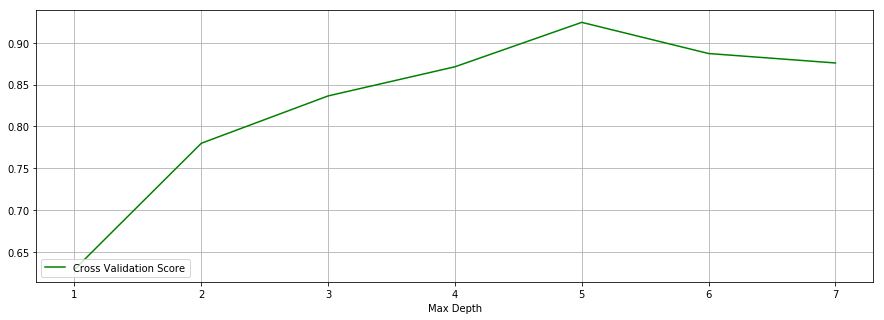

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(1,8), score, c = 'g', label = 'Cross Validation Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xlabel('Max Depth')

In [127]:
from  sklearn.metrics import accuracy_score
dtree = DecisionTreeRegressor(max_depth=5, random_state=0)
bag= BaggingRegressor(dtree, n_estimators=500,max_samples=100, bootstrap=True, random_state=0)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print('Train score: {:.2f}'.format(bag.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag.score(X_test, y_test)))


Train score: 0.90
Test score: 0.83


KNN Regressor Bagging

In [128]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 2}
Best cross-validation score: 0.76


In [129]:

score=[]
for i in range(len(grid_search.grid_scores_)):
    score.append(grid_search.grid_scores_[i][1])

Text(0.5,0,'K Neighbors')

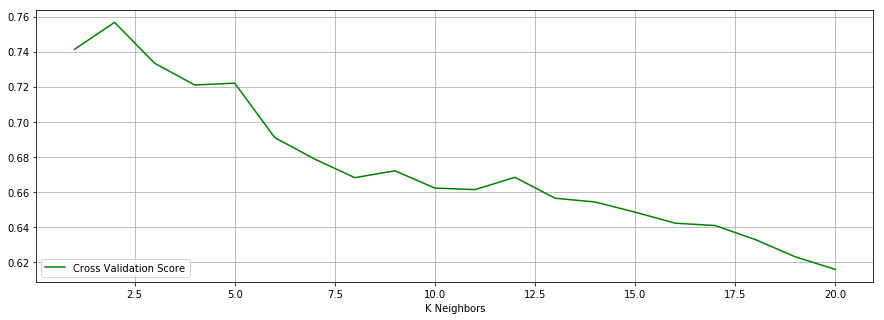

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(1,21), score, c = 'g', label = 'Cross Validation Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xlabel('K Neighbors')

In [131]:
knn = KNeighborsRegressor(2)
bag= BaggingRegressor(knn, n_estimators=500,max_samples=100, bootstrap=True, random_state=0)
bag.fit(X_train, y_train)
print("Train scores: {}".format(bag.score(X_train, y_train)))
print("Test scores: {}".format(bag.score(X_test, y_test)))


Train scores: 0.7603405505469605
Test scores: 0.6876984040147497


# Pasting

SVR

In [132]:
from sklearn.svm import SVR

In [133]:
svr_rbf = SVR(kernel='rbf',epsilon=.1)

#model param
grid_param = {'C':[1,10,100,200,300],'gamma':[0.01,0.1,1,5]}

#grid model
grid_search = GridSearchCV(svr_rbf, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'C': 300, 'gamma': 0.1}
Best score:  0.9755069896328408


In [134]:
index=[]
c_range = [1,10,100,200,300]
g_range = [0.01,0.1,1,5]

for x in c_range:
    for g in g_range:
        index.append((x,g))
        
score=[]
for i in range(len(grid_search.grid_scores_)):
    score.append(grid_search.grid_scores_[i][1])
    

In [135]:
len(index)

20

Text(0.5,0,'C and Gamma')

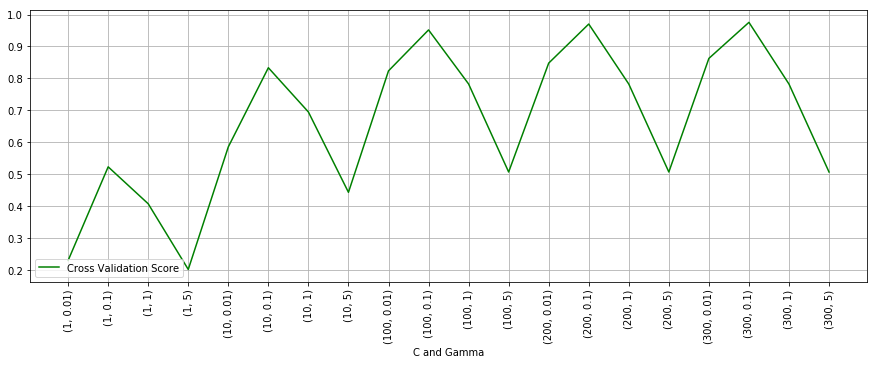

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), score, c = 'g', label = 'Cross Validation Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'C and Gamma')

In [137]:
svr_rbf = SVR(kernel='rbf', C=300, gamma=0.1, epsilon=.1)
bag= BaggingRegressor(svr_rbf, n_estimators=500,max_samples=100, bootstrap=False, random_state=0)
bag.fit(X_train, y_train)
print("Train scores: {}".format(bag.score(X_train, y_train)))
print("Test scores: {}".format(bag.score(X_test, y_test)))

Train scores: 0.9493406391849555
Test scores: 0.9061240319741178


Decision Tree Pasting - Best Parameters from previous Grid Search

In [138]:
from  sklearn.metrics import accuracy_score
dtree = DecisionTreeRegressor(max_depth=5, random_state=0)
bag= BaggingRegressor(dtree, n_estimators=500,max_samples=100, bootstrap=False, random_state=0)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print('Train score: {:.2f}'.format(bag.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag.score(X_test, y_test)))

Train score: 0.92
Test score: 0.85


# AdaBoost

Adaboost-Ridge Regression

In [139]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor

#base model
ridge_reg = Ridge(random_state = 0)
ada_reg = AdaBoostRegressor(ridge_reg)

#grid param
grid_param = {'n_estimators': [10,100,200,300,400,500],
             'learning_rate' : [0.1, 0.5, 1]}

#grid model
grid_search = GridSearchCV(ada_reg, grid_param, cv = 5, return_train_score=True)

#train grid model
grid_search.fit(X_train, y_train)

#grid model evaluation
print("Best Score: ",grid_search.best_score_)

print("Best Paramters: ", grid_search.best_params_)


Best Score:  0.8562646773556435
Best Paramters:  {'learning_rate': 0.1, 'n_estimators': 10}


In [140]:
ada_reg = AdaBoostRegressor(Ridge(random_state=0), n_estimators=10, learning_rate=0.1, random_state=0)
ada_reg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_reg.score(X_test, y_test)))

Train score: 0.89
Test score: 0.90


AdaBoost SVC Kernel Linear

In [141]:

svr_lin = SVR(kernel='linear')

#model param
grid_param = {'C':[1,10,100,200,300]}

#grid model
grid_search = GridSearchCV(svr_lin, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)


Best params:  {'C': 100}
Best score:  0.8054734359700395


In [142]:
ada_reg = AdaBoostRegressor(SVR(kernel='linear',C=100), n_estimators=10, learning_rate=0.1, random_state=0)
ada_reg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_reg.score(X_test, y_test)))

Train score: 0.84
Test score: 0.88


# Gradient Boosting

In [143]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=0)

#model param
grid_param = {'learning_rate':[1,0.5,0.25,0.1,0.05], 'max_depth':[1,2,3,4,5], 'n_estimators':[1,5,10,20,30,50,100]}

#grid model
grid_search = GridSearchCV(gbrt, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score:  0.9687621015473706


In [144]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=100, learning_rate=0.1, random_state=0)
gbrt.fit(X_train, y_train)
print('Train score: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbrt.score(X_test, y_test)))

Train score: 1.00
Test score: 0.96


# PCA

In [145]:
from sklearn.decomposition import PCA


pca = PCA()
#train
pca.fit(X_train)
#transform
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape

(402, 22)

In [146]:
pca.n_components_

22

In [147]:
pca = PCA(n_components = 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
pca.n_components_

8

In [148]:
pca.explained_variance_

array([0.96651881, 0.19200345, 0.15042489, 0.12899541, 0.09849201,
       0.08365935, 0.06035038, 0.04274751])

#### Importing regression results from previous project file to draw comparision between non-PCA model and PCA model results

In [149]:
results = pd.read_csv('RegressionResults.csv')
results

,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,RidgeRegression,without,0.894074,0.905362
2,LassoRegression,without,0.866539,0.902303
3,SGDRegression,without,-7.111675,-6.965662
4,PolyRegression,without,1.000000,1.000000
5,KNNRegression,without,0.951087,0.645903
6,SVR,without,0.473188,0.465114
7,SVR_RBF,without,0.999681,0.969262
8,SVR_Linear,without,0.788536,0.829035
9,SVR_Poly,without,0.999935,0.999520


Linear Regression with PCA

In [150]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train_reduced, y_train)
print("Train scores: {}".format(lreg.score(X_train_reduced, y_train)))
print("Test scores: {}".format(lreg.score(X_test_reduced, y_test)))


Train scores: 0.7686975851819471
Test scores: 0.7574485393164948


In [151]:
line = pd.DataFrame({'Model':"LinearRegression" , 'PCA': "with", 'Train': lreg.score(X_train_reduced, y_train),'Test':lreg.score(X_test_reduced, y_test)}, index=[0.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,LinearRegression,with,0.768698,0.757449
2,RidgeRegression,without,0.894074,0.905362
3,LassoRegression,without,0.866539,0.902303
4,SGDRegression,without,-7.111675,-6.965662
5,PolyRegression,without,1.000000,1.000000
6,KNNRegression,without,0.951087,0.645903
7,SVR,without,0.473188,0.465114
8,SVR_RBF,without,0.999681,0.969262
9,SVR_Linear,without,0.788536,0.829035


### Linear Regression train and test score worsens significantly after PCA . It is clear that PCA results in loss of variation(information) in data while modelling. 

Ridge Regression with PCA

In [152]:
from sklearn.linear_model import Ridge

ridge=Ridge()

#model param
grid_param = {'alpha':[0.001,0.01,0.1,1,10,100]}

#grid model
grid_search = GridSearchCV(ridge, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'alpha': 0.1}
Best score:  0.7502257986122572


In [153]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_reduced, y_test)))

line = pd.DataFrame({'Model':"RidgeRegression" , 'PCA': "with", 'Train': ridge.score(X_train_reduced, y_train),'Test':ridge.score(X_test_reduced, y_test)}, index=[2.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Train score: 0.7683
Test score: 0.7570


,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,LinearRegression,with,0.768698,0.757449
2,RidgeRegression,without,0.894074,0.905362
3,RidgeRegression,with,0.768290,0.757020
4,LassoRegression,without,0.866539,0.902303
5,SGDRegression,without,-7.111675,-6.965662
6,PolyRegression,without,1.000000,1.000000
7,KNNRegression,without,0.951087,0.645903
8,SVR,without,0.473188,0.465114
9,SVR_RBF,without,0.999681,0.969262


### Ridge Regression train and test score worsens significantly after PCA . It is clear that PCA results in loss of variation(information) in data while modelling. 

Lasso Regression with PCA

In [154]:
from sklearn.linear_model import Lasso

lasso=Lasso()

#model param
grid_param = {'alpha':[0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1]}

#grid model
grid_search = GridSearchCV(lasso, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'alpha': 0.01}
Best score:  0.7513247684936506


In [155]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test_reduced, y_test)))

line = pd.DataFrame({'Model':"LassoRegression" , 'PCA': "with", 'Train': lasso.score(X_train_reduced, y_train),'Test':lasso.score(X_test_reduced, y_test)}, index=[4.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Train score: 0.7686
Test score: 0.7580


,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,LinearRegression,with,0.768698,0.757449
2,RidgeRegression,without,0.894074,0.905362
3,RidgeRegression,with,0.768290,0.757020
4,LassoRegression,without,0.866539,0.902303
5,LassoRegression,with,0.768583,0.757975
6,SGDRegression,without,-7.111675,-6.965662
7,PolyRegression,without,1.000000,1.000000
8,KNNRegression,without,0.951087,0.645903
9,SVR,without,0.473188,0.465114


### Lasso Regression train and test score worsens significantly after PCA at 0.95 . It is clear that PCA results in loss of variation(information) in data while modelling. 

In [156]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state=0, max_iter=100000, learning_rate='optimal', penalty='l1')

#model param
grid_param = {'alpha':[0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2]}

#grid model
grid_search = GridSearchCV(sgd_reg, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'alpha': 0.04}
Best score:  0.7525456439862623


In [157]:
sgd_reg = SGDRegressor(random_state=0, max_iter=100000, alpha=0.04, learning_rate='optimal', penalty='l1')
sgd_reg.fit(X_train_reduced, y_train)
print('Train score: {:.4f}'.format(sgd_reg.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(sgd_reg.score(X_test_reduced, y_test)))

line = pd.DataFrame({'Model':"SGDRegression" , 'PCA': "with", 'Train': sgd_reg.score(X_train_reduced, y_train),'Test':sgd_reg.score(X_test_reduced, y_test)}, index=[6.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Train score: 0.7672
Test score: 0.7573


,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,LinearRegression,with,0.768698,0.757449
2,RidgeRegression,without,0.894074,0.905362
3,RidgeRegression,with,0.768290,0.757020
4,LassoRegression,without,0.866539,0.902303
5,LassoRegression,with,0.768583,0.757975
6,SGDRegression,without,-7.111675,-6.965662
7,SGDRegression,with,0.767191,0.757326
8,PolyRegression,without,1.000000,1.000000
9,KNNRegression,without,0.951087,0.645903


### SGD Regression train and test score shoots up significantly after PCA at 0.95 . PCA helps the model capture essential variation and transforms it from performing worse than Naive model to significantly better than Naive model. 

Poly Regression with PCA

In [158]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': [1,2,3,4]}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 5, return_train_score=True)

poly_grid.fit(X_train_reduced, y_train)

print("Best Score: ",poly_grid.best_score_)

print("Best Paramters: ", poly_grid.best_params_)

Best Score:  0.7501923692024967
Best Paramters:  {'polynomialfeatures__degree': 1}


In [159]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train_reduced)
X_test_poly = poly.transform(X_test_reduced)
lreg = LinearRegression()
lreg.fit(X_train_poly, y_train)
print("Train scores: {}".format(lreg.score(X_train_poly, y_train)))
print("Test scores: {}".format(lreg.score(X_test_poly, y_test)))

line = pd.DataFrame({'Model':"PolyRegression" , 'PCA': "with", 'Train': lreg.score(X_train_poly, y_train),'Test':lreg.score(X_test_poly, y_test)}, index=[8.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results


Train scores: 0.7686975851819471
Test scores: 0.7574485393164946


,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,LinearRegression,with,0.768698,0.757449
2,RidgeRegression,without,0.894074,0.905362
3,RidgeRegression,with,0.768290,0.757020
4,LassoRegression,without,0.866539,0.902303
5,LassoRegression,with,0.768583,0.757975
6,SGDRegression,without,-7.111675,-6.965662
7,SGDRegression,with,0.767191,0.757326
8,PolyRegression,without,1.000000,1.000000
9,PolyRegression,with,0.768698,0.757449


### Polynomial Regression train and test score worsens significantly after PCA at 0.95 , it bring dows the perfect scor to approximately 75% for train and test score. It is clear that PCA results in loss of variation(information) in data while modelling. 

KNN Regressor with PCA

In [160]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

#model param
grid_param = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

#grid model
grid_search = GridSearchCV(knn, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'n_neighbors': 3}
Best score:  0.7342539327302701


In [161]:
knn = KNeighborsRegressor(3)
knn.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_reduced, y_test)))

line = pd.DataFrame({'Model':"KNNRegression" , 'PCA': "with", 'Train': knn.score(X_train_reduced, y_train),'Test':knn.score(X_test_reduced, y_test)}, index=[10.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Train score: 0.8616
Test score: 0.6519


,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,LinearRegression,with,0.768698,0.757449
2,RidgeRegression,without,0.894074,0.905362
3,RidgeRegression,with,0.768290,0.757020
4,LassoRegression,without,0.866539,0.902303
5,LassoRegression,with,0.768583,0.757975
6,SGDRegression,without,-7.111675,-6.965662
7,SGDRegression,with,0.767191,0.757326
8,PolyRegression,without,1.000000,1.000000
9,PolyRegression,with,0.768698,0.757449


### KNN Regression train score worsens slightly and test score remains almost the same after PCA at 0.95 . Performing PCA prior to KNN regression fetches almost the same results. 

SVR with PCA 

In [162]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_reduced,y_train)

print("Train scores: {}".format(svr.score(X_train_reduced, y_train)))
print("Test scores: {}".format(svr.score(X_test_reduced, y_test)))

line = pd.DataFrame({'Model':"SVR" , 'PCA': "with", 'Train': svr.score(X_train_reduced, y_train),'Test':svr.score(X_test_reduced, y_test)}, index=[12.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Train scores: 0.5401633097240643
Test scores: 0.5264211454185395


,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,LinearRegression,with,0.768698,0.757449
2,RidgeRegression,without,0.894074,0.905362
3,RidgeRegression,with,0.768290,0.757020
4,LassoRegression,without,0.866539,0.902303
5,LassoRegression,with,0.768583,0.757975
6,SGDRegression,without,-7.111675,-6.965662
7,SGDRegression,with,0.767191,0.757326
8,PolyRegression,without,1.000000,1.000000
9,PolyRegression,with,0.768698,0.757449


### SVR Regression train and test score shoots up slightly after PCA at 0.95 , making it little better than Naive model. Performing PCA prior to SVR regression may slightly fetch better results. 

In [163]:
svr_rbf = SVR(kernel='rbf', epsilon=.1)

#model param
grid_param = {'C':[1,10,100,200,300],'gamma':[0.01,0.1,1,5]}

#grid model
grid_search = GridSearchCV(svr_rbf, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'C': 300, 'gamma': 0.1}
Best score:  0.8664716075245322


In [164]:
svr_rbf = SVR(kernel='rbf', C=300, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train_reduced,y_train)

print("Train scores: {}".format(svr_rbf.score(X_train_reduced, y_train)))
print("Test scores: {}".format(svr_rbf.score(X_test_reduced, y_test)))

line = pd.DataFrame({'Model':"SVR_RBF" , 'PCA': "with", 'Train': svr_rbf.score(X_train_reduced, y_train),'Test':svr_rbf.score(X_test_reduced, y_test)}, index=[14.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Train scores: 0.9194374513423013
Test scores: 0.7842961546798071


,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,LinearRegression,with,0.768698,0.757449
2,RidgeRegression,without,0.894074,0.905362
3,RidgeRegression,with,0.768290,0.757020
4,LassoRegression,without,0.866539,0.902303
5,LassoRegression,with,0.768583,0.757975
6,SGDRegression,without,-7.111675,-6.965662
7,SGDRegression,with,0.767191,0.757326
8,PolyRegression,without,1.000000,1.000000
9,PolyRegression,with,0.768698,0.757449


### SVR RBF Regression train  score worsens slightly but test score drops further down after PCA at 0.95 . It is clear that in this case, PCA results in loss of variation(information) in data while modelling. 

SVR_Linear with PCA

In [165]:
svr_lin = SVR(kernel='linear')

#model param
grid_param = {'C':[1,10,100,200,300]}

#grid model
grid_search = GridSearchCV(svr_lin, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'C': 200}
Best score:  0.70891610251022


In [166]:
svr_lin = SVR(kernel='linear', C=200)
svr_lin.fit(X_train_reduced,y_train)

print("Train scores: {}".format(svr_lin.score(X_train_reduced, y_train)))
print("Test scores: {}".format(svr_lin.score(X_test_reduced, y_test)))

line = pd.DataFrame({'Model':"SVR_Linear" , 'PCA': "with", 'Train': svr_lin.score(X_train_reduced, y_train),'Test':svr_lin.score(X_test_reduced, y_test)}, index=[16.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Train scores: 0.7042911603725673
Test scores: 0.7362340838393324


,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,LinearRegression,with,0.768698,0.757449
2,RidgeRegression,without,0.894074,0.905362
3,RidgeRegression,with,0.768290,0.757020
4,LassoRegression,without,0.866539,0.902303
5,LassoRegression,with,0.768583,0.757975
6,SGDRegression,without,-7.111675,-6.965662
7,SGDRegression,with,0.767191,0.757326
8,PolyRegression,without,1.000000,1.000000
9,PolyRegression,with,0.768698,0.757449


SVR Poly with PCA

In [167]:
svr_poly = SVR(kernel='poly')


#model param
grid_param = {'C':[1,10,100,200,300],'degree':[2,3,4]}

#grid model
grid_search = GridSearchCV(svr_poly, grid_param, cv = 5, n_jobs  = -1)

#train grid model
grid_search.fit(X_train_reduced, y_train)

print('Best params: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best params:  {'C': 300, 'degree': 3}
Best score:  0.8249245777034931


In [168]:
svr_poly = SVR(kernel='poly', C=300, degree=3)
svr_poly.fit(X_train_reduced,y_train)

print("Train scores: {}".format(svr_poly.score(X_train_reduced, y_train)))
print("Test scores: {}".format(svr_poly.score(X_test_reduced, y_test)))

line = pd.DataFrame({'Model':"SVR_Poly" , 'PCA': "with", 'Train': svr_poly.score(X_train_reduced, y_train),'Test':svr_poly.score(X_test_reduced, y_test)}, index=[18.5])
results=results.append(line, ignore_index=False)
results = results.sort_index().reset_index(drop=True)
results

Train scores: 0.9392509676596843
Test scores: 0.8034134544270307


,Model,PCA,Train,Test
0,LinearRegression,without,0.905049,0.916381
1,LinearRegression,with,0.768698,0.757449
2,RidgeRegression,without,0.894074,0.905362
3,RidgeRegression,with,0.768290,0.757020
4,LassoRegression,without,0.866539,0.902303
5,LassoRegression,with,0.768583,0.757975
6,SGDRegression,without,-7.111675,-6.965662
7,SGDRegression,with,0.767191,0.757326
8,PolyRegression,without,1.000000,1.000000
9,PolyRegression,with,0.768698,0.757449


### SVR Linear and SVR Polynomial Regression train  score worsens slightly but test score drops further down after PCA at 0.95 . It is clear that in these case, PCA results in loss of variation(information) in data while modelling. 

# Neural Networks

In [169]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

In [170]:
X_train.shape

(402, 22)

In [171]:
#step 1: make model - no hidden layer
model = Sequential()
#input layer: input_dim = no. of columns in X_train
model.add(Dense(10, input_dim = 22 , activation = 'sigmoid'))

#output layer
model.add(Dense(1))

# step 2: compile the model -> create the computational graph
model.compile(loss ='mse', optimizer = 'sgd' , metrics = ['mse'] )

# step 3: train the model -> fit epochs and batch_size
model.fit(X_train, y_train, epochs = 400, batch_size = 128)

#step 4: evaluation
model.evaluate(X_train, y_train)

Epoch 1/400
402/402 [==============================] - 0s 383us/step - loss: 87.9918 - mean_squared_error: 87.9918
Epoch 2/400
402/402 [==============================] - 0s 15us/step - loss: 78.0952 - mean_squared_error: 78.0952
Epoch 3/400
402/402 [==============================] - 0s 17us/step - loss: 71.7077 - mean_squared_error: 71.7077
Epoch 4/400
402/402 [==============================] - 0s 17us/step - loss: 68.0627 - mean_squared_error: 68.0627
Epoch 5/400
402/402 [==============================] - 0s 12us/step - loss: 66.2785 - mean_squared_error: 66.2785
Epoch 6/400
402/402 [==============================] - 0s 17us/step - loss: 65.1449 - mean_squared_error: 65.1449
Epoch 7/400
402/402 [==============================] - 0s 15us/step - loss: 64.2554 - mean_squared_error: 64.2554
Epoch 8/400
402/402 [==============================] - 0s 17us/step - loss: 63.1012 - mean_squared_error: 63.1012
Epoch 9/400
402/402 [==============================] - 0s 17us/step - loss: 62.3141 - m

402/402 [==============================] - 0s 17us/step - loss: 21.0982 - mean_squared_error: 21.0982
Epoch 73/400
402/402 [==============================] - 0s 17us/step - loss: 20.7908 - mean_squared_error: 20.7908
Epoch 74/400
402/402 [==============================] - 0s 17us/step - loss: 20.5753 - mean_squared_error: 20.5753
Epoch 75/400
402/402 [==============================] - 0s 17us/step - loss: 20.1743 - mean_squared_error: 20.1743
Epoch 76/400
402/402 [==============================] - 0s 17us/step - loss: 19.9000 - mean_squared_error: 19.9000
Epoch 77/400
402/402 [==============================] - 0s 17us/step - loss: 19.6377 - mean_squared_error: 19.6377
Epoch 78/400
402/402 [==============================] - 0s 17us/step - loss: 19.2134 - mean_squared_error: 19.2134
Epoch 79/400
402/402 [==============================] - 0s 15us/step - loss: 18.8844 - mean_squared_error: 18.8844
Epoch 80/400
402/402 [==============================] - 0s 17us/step - loss: 18.6047 - mean_s

402/402 [==============================] - 0s 17us/step - loss: 8.7273 - mean_squared_error: 8.7273
Epoch 144/400
402/402 [==============================] - 0s 20us/step - loss: 8.5994 - mean_squared_error: 8.5994
Epoch 145/400
402/402 [==============================] - 0s 17us/step - loss: 8.5417 - mean_squared_error: 8.5417
Epoch 146/400
402/402 [==============================] - 0s 20us/step - loss: 8.5005 - mean_squared_error: 8.5005
Epoch 147/400
402/402 [==============================] - 0s 15us/step - loss: 8.4172 - mean_squared_error: 8.4172
Epoch 148/400
402/402 [==============================] - 0s 25us/step - loss: 8.2871 - mean_squared_error: 8.2871
Epoch 149/400
402/402 [==============================] - 0s 17us/step - loss: 8.2271 - mean_squared_error: 8.2271
Epoch 150/400
402/402 [==============================] - 0s 20us/step - loss: 8.1786 - mean_squared_error: 8.1786
Epoch 151/400
402/402 [==============================] - 0s 17us/step - loss: 8.0937 - mean_squared_er

402/402 [==============================] - 0s 17us/step - loss: 4.7573 - mean_squared_error: 4.7573
Epoch 215/400
402/402 [==============================] - 0s 15us/step - loss: 4.7277 - mean_squared_error: 4.7277
Epoch 216/400
402/402 [==============================] - 0s 20us/step - loss: 4.7152 - mean_squared_error: 4.7152
Epoch 217/400
402/402 [==============================] - 0s 17us/step - loss: 4.6607 - mean_squared_error: 4.6607
Epoch 218/400
402/402 [==============================] - 0s 17us/step - loss: 4.6581 - mean_squared_error: 4.6581
Epoch 219/400
402/402 [==============================] - 0s 20us/step - loss: 4.6154 - mean_squared_error: 4.6154
Epoch 220/400
402/402 [==============================] - 0s 20us/step - loss: 4.5724 - mean_squared_error: 4.5724
Epoch 221/400
402/402 [==============================] - 0s 17us/step - loss: 4.5637 - mean_squared_error: 4.5637
Epoch 222/400
402/402 [==============================] - 0s 17us/step - loss: 4.4605 - mean_squared_er

402/402 [==============================] - 0s 17us/step - loss: 2.8803 - mean_squared_error: 2.8803
Epoch 286/400
402/402 [==============================] - 0s 17us/step - loss: 2.8634 - mean_squared_error: 2.8634
Epoch 287/400
402/402 [==============================] - 0s 17us/step - loss: 2.8351 - mean_squared_error: 2.8351
Epoch 288/400
402/402 [==============================] - 0s 25us/step - loss: 2.8235 - mean_squared_error: 2.8235
Epoch 289/400
402/402 [==============================] - 0s 17us/step - loss: 2.8052 - mean_squared_error: 2.8052
Epoch 290/400
402/402 [==============================] - 0s 17us/step - loss: 2.7981 - mean_squared_error: 2.7981
Epoch 291/400
402/402 [==============================] - 0s 20us/step - loss: 2.8389 - mean_squared_error: 2.8389
Epoch 292/400
402/402 [==============================] - 0s 17us/step - loss: 2.7644 - mean_squared_error: 2.7644
Epoch 293/400
402/402 [==============================] - 0s 17us/step - loss: 2.7814 - mean_squared_er

Epoch 357/400
402/402 [==============================] - 0s 17us/step - loss: 2.1061 - mean_squared_error: 2.1061
Epoch 358/400
402/402 [==============================] - 0s 25us/step - loss: 2.0951 - mean_squared_error: 2.0951
Epoch 359/400
402/402 [==============================] - 0s 20us/step - loss: 2.0991 - mean_squared_error: 2.0991
Epoch 360/400
402/402 [==============================] - 0s 17us/step - loss: 2.0811 - mean_squared_error: 2.0811
Epoch 361/400
402/402 [==============================] - 0s 17us/step - loss: 2.0871 - mean_squared_error: 2.0871
Epoch 362/400
402/402 [==============================] - 0s 17us/step - loss: 2.0659 - mean_squared_error: 2.0659
Epoch 363/400
402/402 [==============================] - 0s 17us/step - loss: 2.0650 - mean_squared_error: 2.0650
Epoch 364/400
402/402 [==============================] - 0s 22us/step - loss: 2.0500 - mean_squared_error: 2.0500
Epoch 365/400
402/402 [==============================] - 0s 17us/step - loss: 2.0568 - m

[1.806443146805265, 1.806443146805265]

In [172]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train score: ', r2_score(y_train, y_train_pred))
print('Test score: ', r2_score(y_test, y_test_pred))

Train score:  0.9750915990450406
Test score:  0.9419270330509609


### Multilayer

In [175]:
#step 1: build the model
model = Sequential()
#input layer
model.add(Dense(10, input_dim = 22, activation = 'sigmoid'))
#hidden layers

model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
#output layer
model.add(Dense(1))

#step 2: build the computational graph - compile
model.compile(loss = 'mae', optimizer = 'sgd', metrics = ['mse'])

#step 3: train the model
model.fit(X_train, y_train, epochs = 400, batch_size= 20)

#step 4: evaluate
model.evaluate(X_train, y_train)

Epoch 1/400
402/402 [==============================] - 0s 722us/step - loss: 4.0506 - mean_squared_error: 88.4353
Epoch 2/400
402/402 [==============================] - 0s 60us/step - loss: 3.8736 - mean_squared_error: 86.7531
Epoch 3/400
402/402 [==============================] - 0s 57us/step - loss: 3.8371 - mean_squared_error: 86.0502
Epoch 4/400
402/402 [==============================] - 0s 77us/step - loss: 3.8097 - mean_squared_error: 85.4782
Epoch 5/400
402/402 [==============================] - 0s 52us/step - loss: 3.7826 - mean_squared_error: 84.9673
Epoch 6/400
402/402 [==============================] - 0s 57us/step - loss: 3.7495 - mean_squared_error: 84.1648
Epoch 7/400
402/402 [==============================] - 0s 65us/step - loss: 3.7092 - mean_squared_error: 83.7338
Epoch 8/400
402/402 [==============================] - 0s 60us/step - loss: 3.6591 - mean_squared_error: 82.7783
Epoch 9/400
402/402 [==============================] - 0s 57us/step - loss: 3.5974 - mean_squar

402/402 [==============================] - 0s 69us/step - loss: 1.7187 - mean_squared_error: 20.2859
Epoch 73/400
402/402 [==============================] - 0s 62us/step - loss: 1.7036 - mean_squared_error: 18.9934
Epoch 74/400
402/402 [==============================] - 0s 65us/step - loss: 1.6453 - mean_squared_error: 19.1113
Epoch 75/400
402/402 [==============================] - 0s 60us/step - loss: 1.6254 - mean_squared_error: 18.2461
Epoch 76/400
402/402 [==============================] - 0s 65us/step - loss: 1.5411 - mean_squared_error: 17.7364
Epoch 77/400
402/402 [==============================] - 0s 60us/step - loss: 1.6297 - mean_squared_error: 17.5110
Epoch 78/400
402/402 [==============================] - 0s 55us/step - loss: 1.5178 - mean_squared_error: 17.4103
Epoch 79/400
402/402 [==============================] - 0s 57us/step - loss: 1.5539 - mean_squared_error: 17.1061
Epoch 80/400
402/402 [==============================] - 0s 65us/step - loss: 1.5316 - mean_squared_er

402/402 [==============================] - 0s 52us/step - loss: 0.9238 - mean_squared_error: 5.4168
Epoch 144/400
402/402 [==============================] - 0s 65us/step - loss: 0.9071 - mean_squared_error: 5.0483
Epoch 145/400
402/402 [==============================] - 0s 65us/step - loss: 0.8214 - mean_squared_error: 4.3507
Epoch 146/400
402/402 [==============================] - 0s 72us/step - loss: 0.9018 - mean_squared_error: 4.5279
Epoch 147/400
402/402 [==============================] - 0s 55us/step - loss: 0.9160 - mean_squared_error: 4.9656
Epoch 148/400
402/402 [==============================] - 0s 57us/step - loss: 0.8738 - mean_squared_error: 4.4361
Epoch 149/400
402/402 [==============================] - 0s 55us/step - loss: 0.9094 - mean_squared_error: 4.8320
Epoch 150/400
402/402 [==============================] - 0s 69us/step - loss: 0.8694 - mean_squared_error: 4.1801
Epoch 151/400
402/402 [==============================] - 0s 60us/step - loss: 0.9140 - mean_squared_er

Epoch 215/400
402/402 [==============================] - 0s 60us/step - loss: 0.4187 - mean_squared_error: 1.2114
Epoch 216/400
402/402 [==============================] - 0s 60us/step - loss: 0.4176 - mean_squared_error: 1.3110
Epoch 217/400
402/402 [==============================] - 0s 60us/step - loss: 0.4875 - mean_squared_error: 1.5357
Epoch 218/400
402/402 [==============================] - 0s 62us/step - loss: 0.4393 - mean_squared_error: 1.3962
Epoch 219/400
402/402 [==============================] - 0s 65us/step - loss: 0.4049 - mean_squared_error: 1.1472
Epoch 220/400
402/402 [==============================] - 0s 57us/step - loss: 0.4517 - mean_squared_error: 1.3116
Epoch 221/400
402/402 [==============================] - 0s 57us/step - loss: 0.4167 - mean_squared_error: 1.2099
Epoch 222/400
402/402 [==============================] - 0s 65us/step - loss: 0.4617 - mean_squared_error: 1.3513
Epoch 223/400
402/402 [==============================] - 0s 60us/step - loss: 0.4224 - m

402/402 [==============================] - 0s 69us/step - loss: 0.3564 - mean_squared_error: 0.8732
Epoch 287/400
402/402 [==============================] - 0s 60us/step - loss: 0.3911 - mean_squared_error: 0.9901
Epoch 288/400
402/402 [==============================] - 0s 62us/step - loss: 0.3503 - mean_squared_error: 0.9571
Epoch 289/400
402/402 [==============================] - 0s 65us/step - loss: 0.3294 - mean_squared_error: 0.9105
Epoch 290/400
402/402 [==============================] - 0s 89us/step - loss: 0.3689 - mean_squared_error: 0.7942
Epoch 291/400
402/402 [==============================] - 0s 67us/step - loss: 0.3262 - mean_squared_error: 0.8982
Epoch 292/400
402/402 [==============================] - 0s 62us/step - loss: 0.3331 - mean_squared_error: 0.7857
Epoch 293/400
402/402 [==============================] - 0s 62us/step - loss: 0.4334 - mean_squared_error: 1.1916
Epoch 294/400
402/402 [==============================] - 0s 74us/step - loss: 0.3329 - mean_squared_er

402/402 [==============================] - 0s 57us/step - loss: 0.3056 - mean_squared_error: 0.6926
Epoch 358/400
402/402 [==============================] - 0s 57us/step - loss: 0.3433 - mean_squared_error: 0.7541
Epoch 359/400
402/402 [==============================] - 0s 55us/step - loss: 0.3297 - mean_squared_error: 0.7524
Epoch 360/400
402/402 [==============================] - 0s 69us/step - loss: 0.3087 - mean_squared_error: 0.6751
Epoch 361/400
402/402 [==============================] - 0s 60us/step - loss: 0.3287 - mean_squared_error: 0.6266
Epoch 362/400
402/402 [==============================] - 0s 55us/step - loss: 0.3567 - mean_squared_error: 0.8633
Epoch 363/400
402/402 [==============================] - 0s 60us/step - loss: 0.4060 - mean_squared_error: 1.3527
Epoch 364/400
402/402 [==============================] - 0s 55us/step - loss: 0.4238 - mean_squared_error: 1.7456
Epoch 365/400
402/402 [==============================] - 0s 67us/step - loss: 0.3221 - mean_squared_er

[0.2607479913910823, 0.5989475855186804]

In [176]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('Train score: ', r2_score(y_train, y_train_pred))
print('Test score: ', r2_score(y_test, y_test_pred))

Train score:  0.9917413244507147
Test score:  0.9715929365359686
